<a href="https://colab.research.google.com/github/up3082002/DATA-SCIENCE-PROJECTS/blob/main/car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets/car_evaluation.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data.shape

(1728, 7)

In [ ]:
for i in data.columns:
  print(data[i].unique(),"\t",data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [ ]:
for i in data.columns:
    print(data[i].value_counts())
    print()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

2       576
4       576
more    576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



In [ ]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


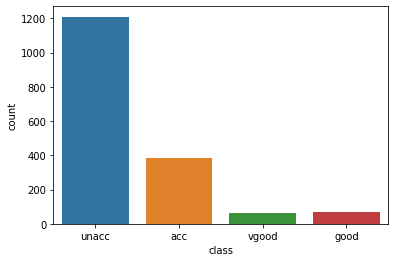

In [ ]:
sns.countplot(data['class'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])
    

In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [ ]:
data.corr()

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000e+00,-3.436808e-16,-2.097088e-16,-4.089152e-17,-1.691262e-16,-2.439415e-16,0.051424
maint,-3.436808e-16,1.000000e+00,-6.466021e-17,-4.272143e-17,-1.549092e-16,-1.404810e-16,0.040194
doors,-2.097088e-16,-6.466021e-17,1.000000e+00,1.956599e-17,-1.942523e-17,1.062757e-16,-0.031327
persons,-4.089152e-17,-4.272143e-17,1.956599e-17,1.000000e+00,3.854941e-18,3.392348e-17,-0.299468
lug_boot,-1.691262e-16,-1.549092e-16,-1.942523e-17,3.854941e-18,1.000000e+00,-1.541976e-17,0.033184
safety,-2.439415e-16,-1.404810e-16,1.062757e-16,3.392348e-17,-1.541976e-17,1.000000e+00,-0.021044
class,5.142422e-02,4.019365e-02,-3.132740e-02,-2.994683e-01,3.318432e-02,-2.104372e-02,1.000000


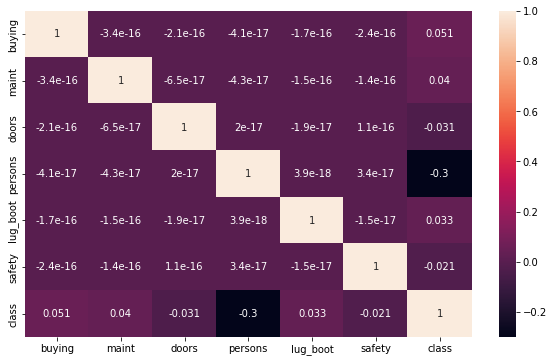

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [ ]:
X=data[data.columns[:-1]]
y=data['class']

In [ ]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')
logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)
logreg.score(X_test,y_test)

0.6647398843930635

In [ ]:
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.9094412331406551

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.81       118
           1       0.71      0.53      0.61        19
           2       0.92      1.00      0.96       358
           3       1.00      0.67      0.80        24

    accuracy                           0.91       519
   macro avg       0.88      0.74      0.79       519
weighted avg       0.91      0.91      0.90       519



Text(0, 0.5, 'accuracy')

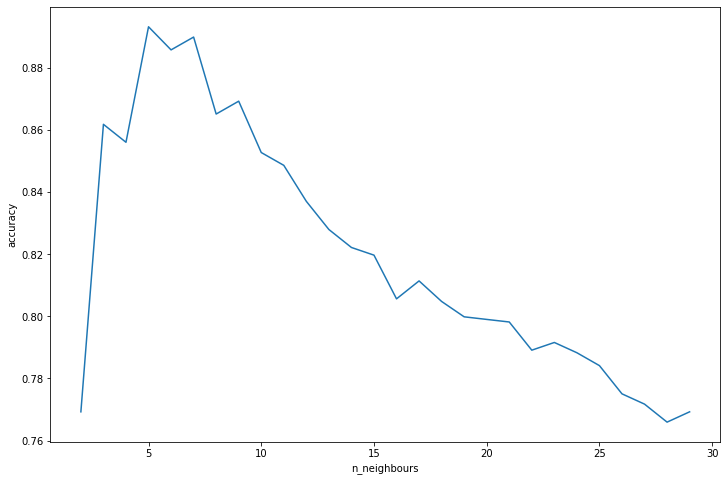

In [ ]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))